#🔮**Support Vector Regression**##

####**What Is SVR ?**##

**Support Vector Regression(SVR)** is a **Support Vector Machine(SVM)** Uused for regression tasks instead of classification.

####Load & Explore The DataSet

In [44]:
import pandas as pd

df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [45]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [47]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [48]:
df.dropna(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


####Feature Scaling(Very Important for SVR)

SVR uses distance-based calculations,so scaling ensures all features contribute equally.

In [50]:
from sklearn.preprocessing import StandardScaler

X=df[['Years of Experience']].values
y=df[['Salary']].values

sc_X=StandardScaler()
sc_y=StandardScaler()

X_scaled=sc_X.fit_transform(X)
y_scaled=sc_y.fit_transform(y)

####Flatten y for SVR

In [51]:
y_scaled

array([[-0.47983873],
       [-0.95348286],
       [ 0.65690718],
       ...,
       [-1.14294051],
       [ 0.46744953],
       [-1.52185581]])

In [52]:
y_scaled=y_scaled.ravel()

In [53]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

####Train SVR Model (RBF Kernel)

In [54]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf',C=100,epsilon=0.1)
svr.fit(X_scaled,y_scaled)

SVR(C=100)

####Predictions And Inverse Scaling

In [55]:
y_pred_scaled=svr.predict(X_scaled)
y_pred=sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [56]:
y_pred_scaled

array([-0.44592988, -0.95928686,  1.16101663, ..., -0.71943669,
        1.02434885, -1.33765207])

In [57]:
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

####Visualization:Actual vs Predicted

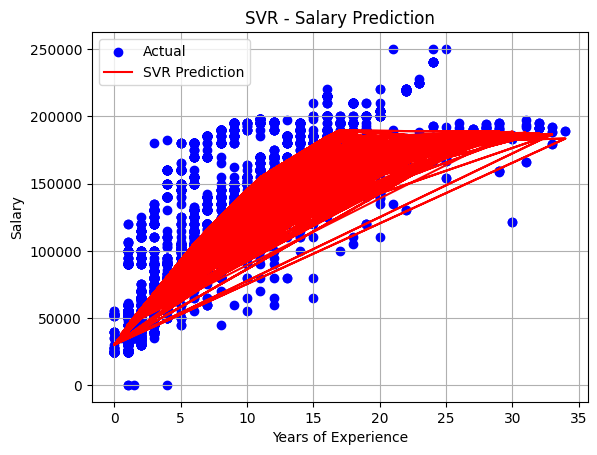

In [58]:
import matplotlib.pyplot as plt

plt.scatter(X,y,color='blue',label='Actual')
plt.plot(X,y_pred,color="red",label='SVR Prediction')
plt.title('SVR - Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

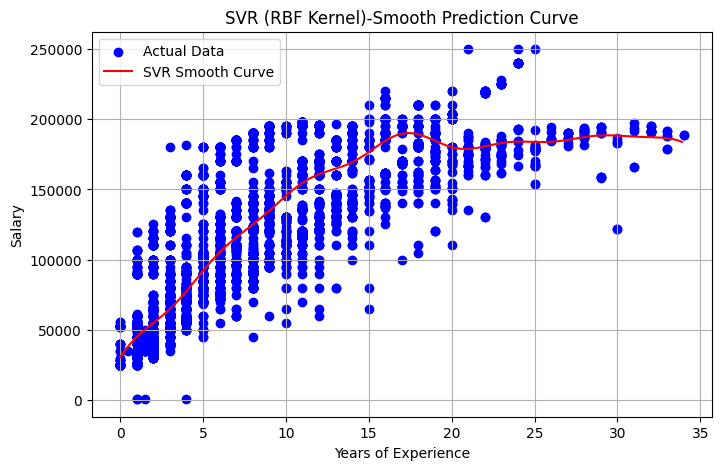

In [59]:
import numpy as np
import matplotlib.pyplot as plt

#Create a fine grid between min & max Years of Experience
X_grid=np.arange(min(X.ravel()),max(X.ravel()),0.1)
X_grid=X_grid.reshape(-1,1)

#Scale X_grid just like tarining data
X_grid_scaled=sc_X.transform(X_grid)

#Predict on the grid and inverse transform the results
y_grid_scaled=svr.predict(X_grid_scaled)
y_grid=sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

#Plot
plt.figure(figsize=(8,5))
plt.scatter(X,y,color='blue',label='Actual Data')
plt.plot(X_grid,y_grid,color="red",label='SVR Smooth Curve')
plt.title("SVR (RBF Kernel)-Smooth Prediction Curve")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()

####Evaluate Model Performance

In [60]:
from sklearn.metrics import mean_squared_error,r2_score

mse=mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2=r2_score(y,y_pred)

print("Mean Squared Error(MSE):",mse)
print("Root Mean Squared Error(RMSE):",rmse)
print("R-Squared(R2 Score):",r2)

Mean Squared Error(MSE): 759013901.8514212
Root Mean Squared Error(RMSE): 27550.20692937571
R-Squared(R2 Score): 0.7275580175081495


####Compare Kernels Using Code

Kernel: LINEAR | R2 Score for: 0.6326


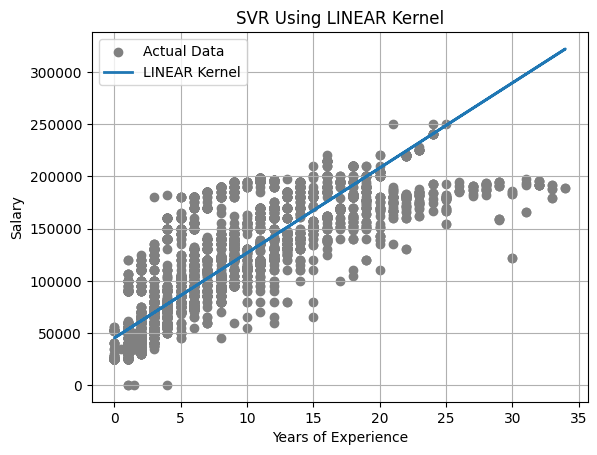

Kernel: POLY | R2 Score for: -0.0216


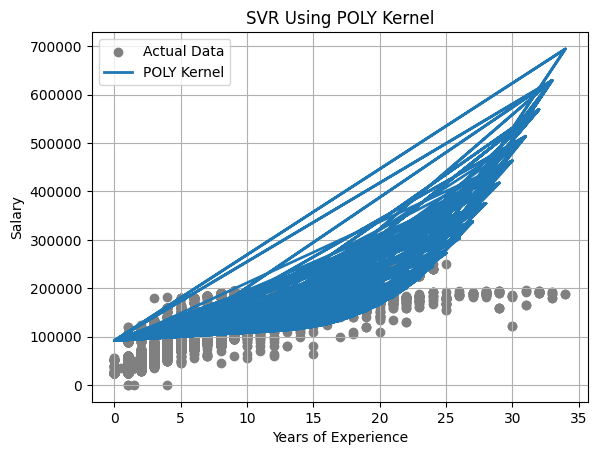

Kernel: RBF | R2 Score for: 0.7249


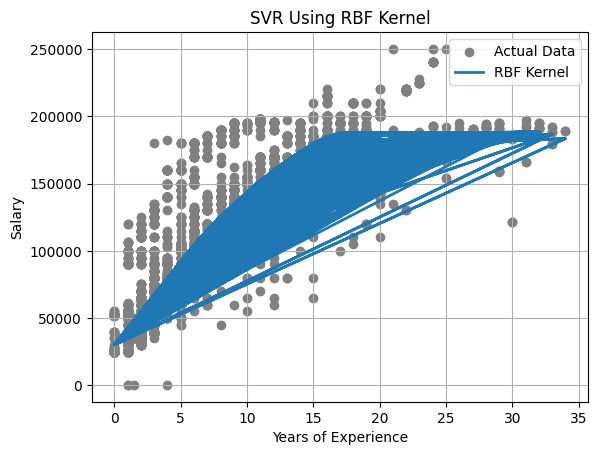

In [63]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#1. Load And Scale Data
X = df[['Years of Experience']].values
y = df[['Salary']].values

sc_X = StandardScaler()
sc_y = StandardScaler()

X_scaled = sc_X.fit_transform(X)
y_scaled = sc_y.fit_transform(y).ravel() #Flatten y

#2. Define Kernels
kernels = ['linear','poly','rbf']

#3. Train And Evaluate Each Kernel
for kernel in kernels:
  if kernel == 'poly':
    model = SVR (kernel=kernel, degree=3)
  else:
    model = SVR(kernel=kernel)
  model.fit(X_scaled,y_scaled)

#4.Predict For Training Data
  y_pred_scaled = model.predict(X_scaled)
  y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

#5.Evaluation
  score=r2_score(y,y_pred)
  print(f"Kernel: {kernel.upper()} | R2 Score for: {score:.4f}")

#6.Plot
  plt.scatter(X,y,color='gray',label='Actual Data')
  plt.plot(X,y_pred,label=f'{kernel.upper()} Kernel',linewidth='2')
  plt.title(f'SVR Using {kernel.upper()} Kernel')
  plt.xlabel('Years of Experience')
  plt.ylabel('Salary')
  plt.grid(True)
  plt.legend()
  plt.show()

####Try Different C and Epsilon Values

Kernel: RBF | R2 Score for: 0.7249


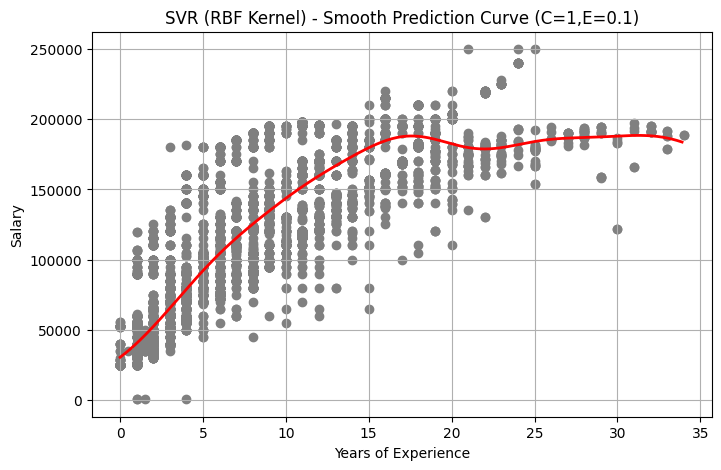

Kernel: RBF | R2 Score for: 0.7249


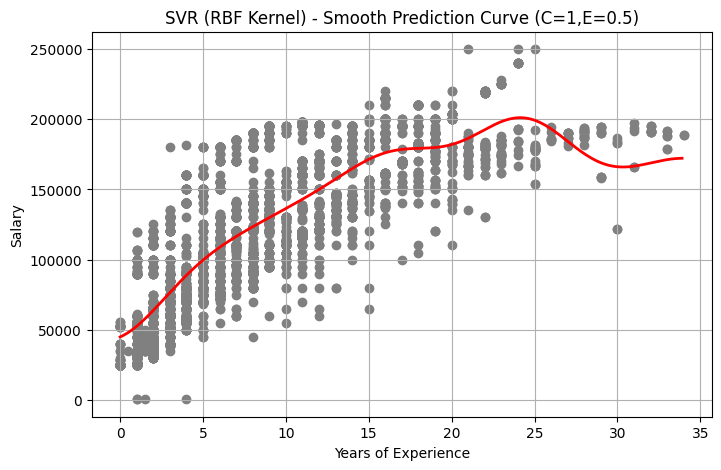

Kernel: RBF | R2 Score for: 0.7249


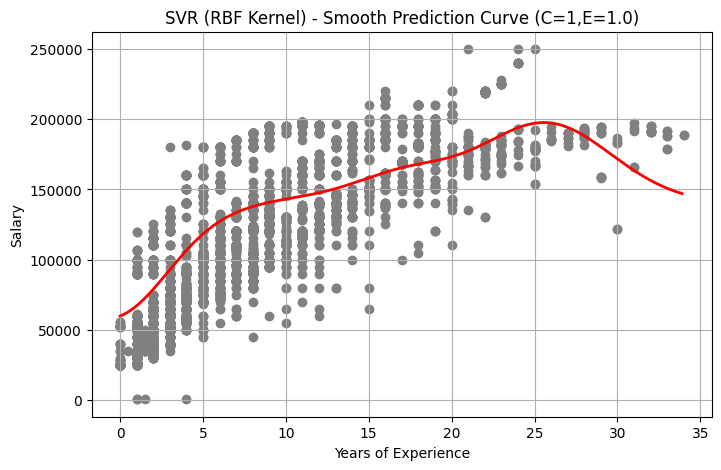

Kernel: RBF | R2 Score for: 0.7249


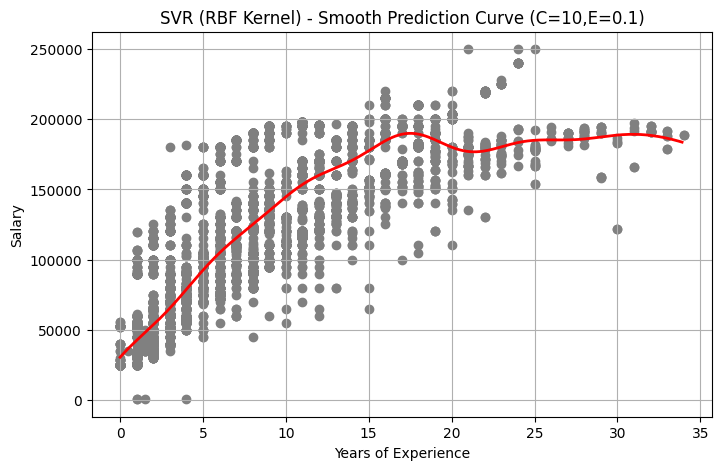

Kernel: RBF | R2 Score for: 0.7249


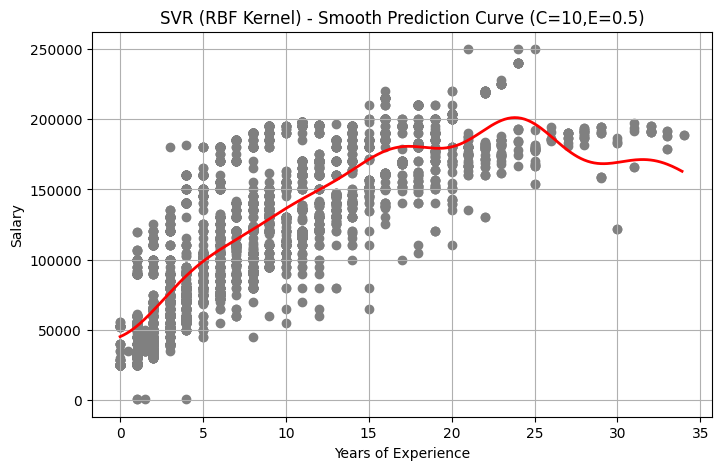

Kernel: RBF | R2 Score for: 0.7249


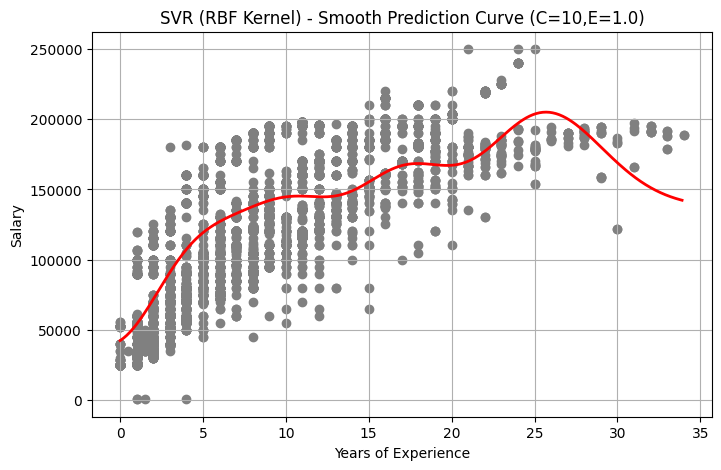

Kernel: RBF | R2 Score for: 0.7249


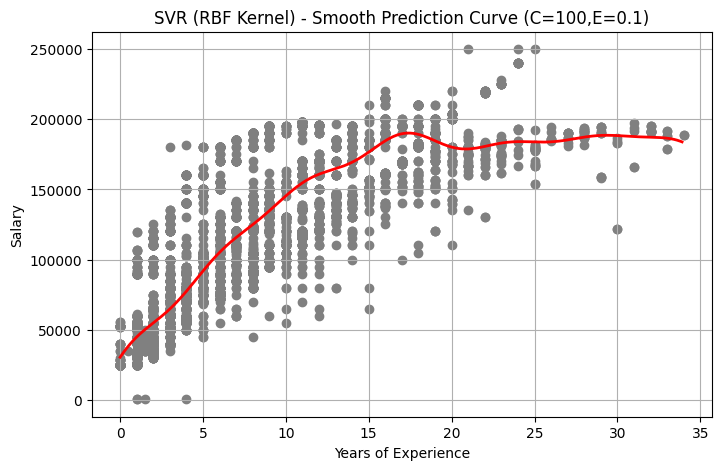

Kernel: RBF | R2 Score for: 0.7249


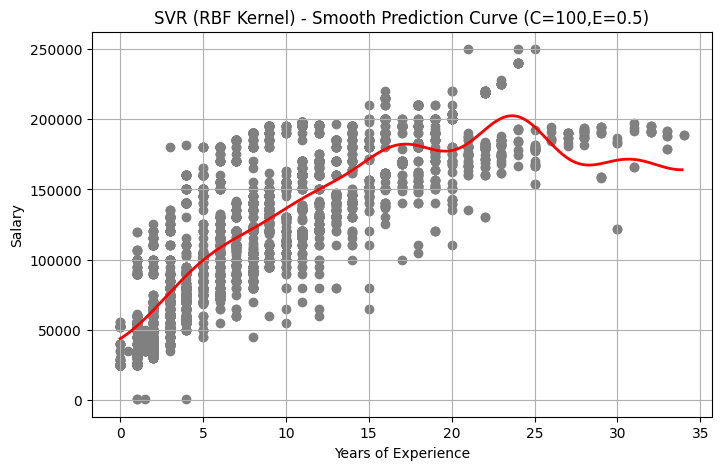

Kernel: RBF | R2 Score for: 0.7249


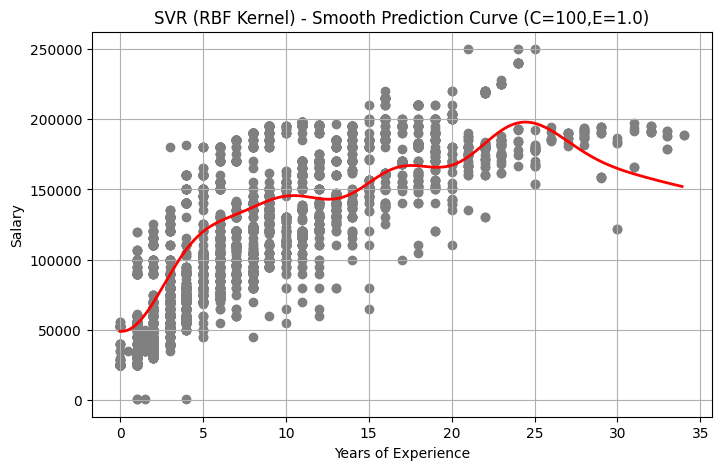

In [66]:
C_values = [1,10,100]
epsilon_values = [0.1,0.5,1.0]

X_grid = np.arange(min(X.ravel()),max(X.ravel()),0.1)
X_grid = X_grid.reshape(-1,1)

X_grid_scaled = sc_X.transform(X_grid)

for c in C_values:
  for eps in epsilon_values:
    model = SVR(kernel='rbf',C=c,epsilon=eps)
    model.fit(X_scaled,y_scaled)

    y_grid_scaled = model.predict(X_grid_scaled)
    y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

    score=r2_score(y,y_pred)
    print(f"Kernel: {kernel.upper()} | R2 Score for: {score:.4f}")

    plt.figure(figsize=(8,5))
    plt.scatter(X,y,color='gray',label='Actual Data')
    plt.plot(X_grid,y_grid,color='red',label=f'SVR (C={c},E={eps})',linewidth=2)
    plt.title(f'SVR (RBF Kernel) - Smooth Prediction Curve (C={c},E={eps})')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.grid(True)
    plt.show()